In [1]:
#Edgar Moises Hernandez-Gonzalez
#13/06/19-24/06/19
#Optimizacion por enjambre de particulas
#Minimizar z = f(x,y) = x^2 + y^2
#Las posiciones deben ser numeros discretos (enteros)
#se debe cumplir que los valores esten entre 3 y 198
#dado que es un problema de minimizacion la solucion es [3, 3]

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#tamano de la poblacion
n = 32
#numero de variables
m = 2

In [4]:
#inicializar cumulo (enjambre)
#posicion = np.random.randint(3, 198 + 1, size = (n, m)) #[bajo, alto) por eso +1
#esto es por si cada variable tiene diferente rango de valores
x1 = np.random.randint(3, 198 + 1, size = n) #[bajo, alto) por eso +1
x2 = np.random.randint(3, 198 + 1, size = n) #[bajo, alto) por eso +1
posicion = np.stack((x1, x2), axis = -1)
#inicializar velocidades
velocidad = np.random.rand(n, m)

In [5]:
#estos no deberian ser aleatorios, pero asi dan mejores resultados
w = np.random.rand()
c1 = np.random.rand()
c2 = np.random.rand()

In [6]:
#fitness para x^2 + y^2
fitness = np.zeros(n)
for i in range(n):
    fitness[i] = posicion[i, 0]**2 + posicion[i, 1]**2

In [7]:
#inicializar pBest
pBest = np.zeros((n,m))
pBest = pBest.astype(int)
for i in range(n):
    for j in range(m):
        pBest[i, j] = posicion[i, j]

In [8]:
valorMin = np.min(fitness)
indiceMin = np.argmin(fitness)
gBest = np.zeros(m)
for i in range(m):
    gBest[i] = posicion[indiceMin, i]
print("Global Best:", gBest)
print("f(x)=", valorMin)

Global Best: [12. 12.]
f(x)= 288.0


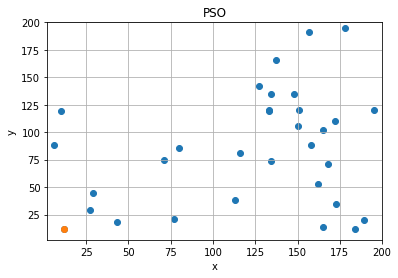

In [9]:
plt.scatter(posicion[:, 0], posicion[:, 1])
plt.scatter(gBest[0], gBest[1])
plt.title('PSO')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.axis([2, 200, 2, 200])
plt.show()

In [10]:
iteracion = 1
while iteracion <= 100:
    #seleccionar al lider gBest
    if np.min(fitness) < valorMin:
        valorMin = np.min(fitness)
        indiceMin = np.argmin(fitness)
        for i in range(m):
            gBest[i] = posicion[indiceMin, i]
        print("Iteracion", iteracion)
        print("Global Best:", gBest)
        print("f(x)=", valorMin)
    for i in range(n):
        for j in range(m):
            velocidad[i, j] = w * velocidad[i, j] + (c1 * np.random.rand() * (pBest[i, j] - posicion[i, j])) + (c2 * np.random.rand() * (gBest[j] - posicion[i, j]))
            posicion[i, j] += velocidad[i, j]
    #fitness para x^2 + y^2
    for i in range(n):
        if posicion[i, 0] >= 3 and posicion[i, 0] <= 198 and posicion[i, 1] >= 3 and posicion[i, 1] <= 198:
            fitness[i] = posicion[i, 0]**2 + posicion[i, 1]**2
    #actualizar el pBest
    for i in range(n):
        if pBest[i, 0] >= 3 and pBest[i, 0] <= 198 and pBest[i, 1] >= 3 and pBest[i, 1] <= 198:
            if fitness[i] < pBest[i, 0]**2 + pBest[i, 1]**2:
                for j in range(m):
                    pBest[i, j] = posicion[i, j]
    iteracion += 1

Iteracion 18
Global Best: [11. 12.]
f(x)= 265.0
Iteracion 19
Global Best: [11. 11.]
f(x)= 242.0
Iteracion 20
Global Best: [10. 11.]
f(x)= 221.0
Iteracion 21
Global Best: [ 9. 10.]
f(x)= 181.0
Iteracion 22
Global Best: [8. 9.]
f(x)= 145.0
Iteracion 23
Global Best: [7. 8.]
f(x)= 113.0
Iteracion 24
Global Best: [6. 7.]
f(x)= 85.0
Iteracion 25
Global Best: [5. 6.]
f(x)= 61.0
Iteracion 26
Global Best: [4. 5.]
f(x)= 41.0
Iteracion 27
Global Best: [3. 4.]
f(x)= 25.0
Iteracion 34
Global Best: [3. 3.]
f(x)= 18.0


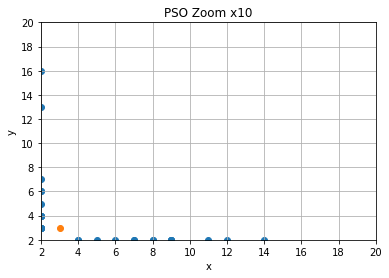

In [11]:
plt.scatter(posicion[:, 0], posicion[:, 1])
plt.scatter(gBest[0], gBest[1])
plt.title('PSO Zoom x10')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.axis([2, 20, 2, 20])
plt.show()